In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [5]:
class BatsmanState(TypedDict):
    runs:int
    balls: int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percentage:float
    summary:str

In [6]:
def calculate_sr(state:BatsmanState):
    sr = (state['run'] / state['balls']) * 100
    return{'sr':sr}


In [7]:
def calculate_bpb(state:BatsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb':bpb}

In [8]:
def calculate_boundary_percentage(state:BatsmanState):
    boundary_percentage = (((state['fours'] *4) + (state['sixes'] *6)) / state['runs']) *100
    return{'boundary_percent':boundary_percentage}

In [9]:
def summary(state:BatsmanState):
    summary = f"""
                Strike Rate - {state['sr']} \n
                Balls per boundary - {state['bpb']} \n
                Boundary Percent - {state['boundary_percentage']}
               """
    return {'summary':summary}
                  

In [26]:
graph = StateGraph(BatsmanState)
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percentage')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')
graph.add_edge('summary', END)
workflow = graph.compile()


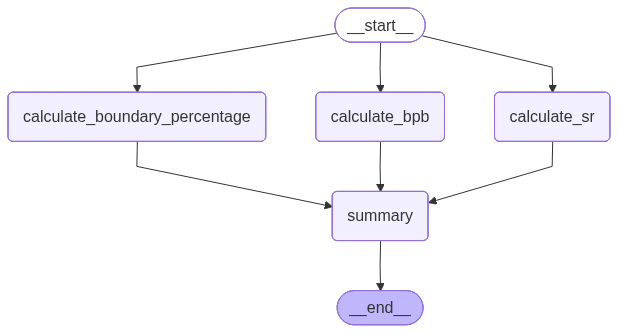

In [23]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
initial_state = {'runs':100,
                 'balls':50,
                 'fours':6,
                 'sixes':4
                }
workflow.invoke(initial_state)